O Forecasting, ou previsão, é uma técnica utilizada para estimar valores futuros com base em dados históricos. O GRU, que significa Gated Recurrent Unit, é um tipo de rede neural recorrente (RNN) que é comumente utilizada em problemas de previsão de séries temporais devido à sua capacidade de lidar com sequências de dados.

Prever o "forecast" de vendas para 28 dias [d_1914 a d1941]

Importando Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from datetime import datetime, timedelta, timezone

from itertools import cycle
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import gc

from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

import math
from math import sqrt
from sklearn.model_selection import GridSearchCV
from pprint import pprint

from lightgbm import LGBMRegressor

#plt.style.use("dark_background")


from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Flatten,Embedding,Activation,Dropout
from keras.layers import Conv1D,MaxPooling1D,GlobalMaxPooling1D,LSTM
from keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler

Load Data

In [2]:
#Importando preços 
url1 = 'https://drive.google.com/file/d/1WAbTdLmhm0Ih971SU3AY_RoXpfPJAMTi/view?usp=drive_link'
path1 = 'https://drive.google.com/uc?export=download&id='+url1.split('/')[-2]
df_price1 = pd.read_csv(path1)

url2 = 'https://drive.google.com/file/d/1J7oWaSGJVSiTl5TifTEgvbg0d08iSryf/view?usp=drive_link'
path2 = 'https://drive.google.com/uc?export=download&id='+url2.split('/')[-2]
df_price2 = pd.read_csv(path2)

url3 = 'https://drive.google.com/file/d/1qXDbN6ib9HO5oFbI3MtdvTfXP066hYZ6/view?usp=drive_link'
path3 = 'https://drive.google.com/uc?export=download&id='+url3.split('/')[-2]
df_price3 = pd.read_csv(path3)

url4 = 'https://drive.google.com/file/d/1tgdpfFtl1DVczTouPUDc5tLcAbh7SpWP/view?usp=drive_link'
path4 = 'https://drive.google.com/uc?export=download&id='+url4.split('/')[-2]
df_price4 = pd.read_csv(path4)

url5 = 'https://drive.google.com/file/d/1NxHF52tEXTqbglY-14_WpLsDEnYHBnuK/view?usp=drive_link'
path5 = 'https://drive.google.com/uc?export=download&id='+url5.split('/')[-2]
df_price5 = pd.read_csv(path5)

df_price = pd.concat([df_price1, df_price2, df_price3, df_price4, df_price5], ignore_index=True)

In [3]:
#Importando Vendas 
url1 = 'https://drive.google.com/file/d/1sKG9E753lvXJPB5l3RktNct71J-xh_8w/view?usp=drive_link'
path1 = 'https://drive.google.com/uc?export=download&id='+url1.split('/')[-2]
df_sales1 = pd.read_csv(path1)

url2 = 'https://drive.google.com/file/d/1u0A_yubzWjWTWLFVrm7asWs395BQ578E/view?usp=drive_link'
path2 = 'https://drive.google.com/uc?export=download&id='+url2.split('/')[-2]
df_sales2 = pd.read_csv(path2)

url3 = 'https://drive.google.com/file/d/1NlRLGEEeUxlPDpt2FgrVvjiT_y_jHluh/view?usp=drive_link'
path3 = 'https://drive.google.com/uc?export=download&id='+url3.split('/')[-2]
df_sales3 = pd.read_csv(path3)

url4 = 'https://drive.google.com/file/d/13gowR6492BQrfQvU5_kYE5xxF3gWum38/view?usp=drive_link'
path4 = 'https://drive.google.com/uc?export=download&id='+url4.split('/')[-2]
df_sales4 = pd.read_csv(path4)

url5 = 'https://drive.google.com/file/d/1FsYLisvlMXxMz6BeUu1-1iuumVaYb9J-/view?usp=drive_link'
path5 = 'https://drive.google.com/uc?export=download&id='+url5.split('/')[-2]
df_sales5 = pd.read_csv(path5)

url6 = 'https://drive.google.com/file/d/14AbgBUnbixFjv_8pPlUkchxFQ4kytgsb/view?usp=drive_link'
path6 = 'https://drive.google.com/uc?export=download&id='+url6.split('/')[-2]
df_sales6 = pd.read_csv(path6)

df_sales = pd.concat([df_sales1, df_sales2, df_sales3, df_sales4, df_sales5, df_sales6], ignore_index=True)

In [4]:
# Importando eventos
url = 'https://drive.google.com/file/d/1h94avu15TuiguEiwdKhzL06EBNkcmSjv/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df_events = pd.read_csv(path)
print('Tamanho:',  df_events.shape)
print(df_events.head())

Tamanho: (1913, 5)
         date    weekday  weekday_int    d event
0  2011-01-29   Saturday            1  d_1   NaN
1  2011-01-30     Sunday            2  d_2   NaN
2  2011-01-31     Monday            3  d_3   NaN
3  2011-02-01    Tuesday            4  d_4   NaN
4  2011-02-02  Wednesday            5  d_5   NaN


In [5]:
sample = pd.read_csv(r'.\data\sample_submission.csv')

In [2]:
'''sales_data = pd.read_csv('D:\Arquivos Trabalho Rodrigo 2024\PES\data1\item_sales.csv')
price_data = pd.read_csv('D:\Arquivos Trabalho Rodrigo 2024\PES\data1\item_prices.csv')
calendar_and_promos_data = pd.read_csv('D:\Arquivos Trabalho Rodrigo 2024\PES\data1\daily_calendar_with_events.csv')
sample = pd.read_csv(r'.data\sample_submission.csv')'''

In [6]:
def reduce_mem_usage(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    
    for col in df.columns:
        col_type = df[col].dtypes
        
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        
        elif col_type == 'object':
            num_unique_values = len(df[col].unique())
            num_total_values = len(df[col])
            if num_unique_values / num_total_values < 0.5:
                df[col] = df[col].astype('category')
    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: 
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    
    return df


In [7]:
df_events['date'] = pd.to_datetime(df_events['date'])

In [8]:
# Substituindo 'No_event' por 'Christmas' na coluna 'event' para datas específicas
df_events.loc[pd.isna(df_events['event']) & 
    (df_events['date'].dt.month == 12) & 
    (df_events['date'].dt.day == 25), 
    'event'] = 'Christmas'

In [9]:
df_events.isnull().sum()

date              0
weekday           0
weekday_int       0
d                 0
event          1882
dtype: int64

In [10]:
df_events = df_events.dropna(subset=['event'])

In [11]:
df_events.isnull().sum()

date           0
weekday        0
weekday_int    0
d              0
event          0
dtype: int64

In [12]:
df_price.isnull().sum()

item               0
category           0
store_code         0
yearweek      243920
sell_price         0
dtype: int64

In [13]:
df_price = df_price.dropna(subset=['yearweek'])


In [14]:
df_price.isnull().sum()

item          0
category      0
store_code    0
yearweek      0
sell_price    0
dtype: int64

In [15]:
df_events = reduce_mem_usage(df_events)

df_price = reduce_mem_usage(df_price)

df_sales = reduce_mem_usage(df_sales)

sample = reduce_mem_usage(sample)

Mem. usage decreased to  0.00 Mb (14.2% reduction)
Mem. usage decreased to 115.47 Mb (62.5% reduction)
Mem. usage decreased to 94.12 Mb (78.9% reduction)
Mem. usage decreased to  2.09 Mb (84.5% reduction)


In [16]:
df_events.head(2)

,date,weekday,weekday_int,d,event
8,2011-02-06,Sunday,2,d_9,SuperBowl
184,2011-08-01,Monday,3,d_185,Ramadan starts


In [17]:
df_sales.head(2)

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [18]:
df_price.head(2)

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.742188
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.742188


In [19]:
sample.head(2)

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,ACCESORIES_1_001_NYC_1_validadtion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ACCESORIES_1_002_NYC_1_validadtion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_sales.shape,df_events.shape,df_price.shape

((30490, 1920), (31, 5), (6721786, 5))

In [21]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1920 entries, id to d_1913
dtypes: category(6), int16(1306), int8(607), object(1)
memory usage: 94.1+ MB


In [22]:
df_sales.columns

Index(['id', 'item', 'category', 'department', 'store', 'store_code', 'region',
       'd_1', 'd_2', 'd_3',
       ...
       'd_1904', 'd_1905', 'd_1906', 'd_1907', 'd_1908', 'd_1909', 'd_1910',
       'd_1911', 'd_1912', 'd_1913'],
      dtype='object', length=1920)

In [23]:
df_sales.drop(['item','department','category','store_code','region', 'store'], axis=1,inplace=True)

In [24]:
df_sales.head(2)

,id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
df_sales.isnull().sum().sort_values(ascending = False)

id        0
d_1271    0
d_1283    0
d_1282    0
d_1281    0
         ..
d_634     0
d_633     0
d_632     0
d_631     0
d_1913    0
Length: 1914, dtype: int64

In [26]:
df_events.isnull().sum().sort_values(ascending = False)

date           0
weekday        0
weekday_int    0
d              0
event          0
dtype: int64

In [27]:
for i in range(1914,1942):
    col = "d_"+ str(i)
    df_sales[col] = 0

In [28]:
df_sales.head(2)

,id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,ACCESORIES_1_001_NYC_1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ACCESORIES_1_002_NYC_1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
train_new = df_sales.T
train_new.shape

(1942, 30490)

In [30]:
train_new = train_new[1:]
train_new

,0,1,2,3,4,5,6,7,8,9,...,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
d_1,0,0,0,0,0,0,0,12,2,0,...,0,14,1,0,4,0,0,0,0,0
d_2,0,0,0,0,0,0,0,15,0,0,...,0,11,1,0,4,0,0,6,0,0
d_3,0,0,0,0,0,0,0,0,7,1,...,0,5,1,0,2,2,0,0,0,0
d_4,0,0,0,0,0,0,0,0,3,0,...,0,6,1,0,5,2,0,2,0,0
d_5,0,0,0,0,0,0,0,0,0,0,...,0,5,1,0,2,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d_1938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d_1939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d_1940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
train_new.shape

(1941, 30490)

In [32]:
sc = MinMaxScaler(feature_range = (0, 1))
train_new = sc.fit_transform(train_new)

In [33]:
len(train_new)

1941

In [34]:
# training data, from 0 to 1913
X = []
lookup = 14
for i in range(0,1871): 
    X.append(train_new[i:i+lookup])

In [35]:
j=0
y=[]
for i in range(lookup,1885):    
    y.append(train_new[i][0:30490])
print(len(y))

1871


In [36]:
# Test train split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
X_train = np.array(X_train, dtype = 'float16')
y_train = np.array(y_train, dtype = 'float16')

In [38]:
X_train.shape,y_train.shape

((1496, 14, 30490), (1496, 30490))

In [39]:
from keras.layers import LSTM
from keras.layers import GRU

model = Sequential()

model.add(GRU(64,input_shape=(np.array(X_train).shape[1], np.array(X_train).shape[2]),return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(64,return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(64,return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(64))
model.add(Dropout(0.2))

model.add(tf.keras.layers.Dense(30490))

In [40]:
model.compile(
  loss='mse',
  metrics=[tf.keras.metrics.MeanSquaredError()],
  optimizer=tf.keras.optimizers.Adam(0.001)
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 14, 64)         │     5,866,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 14, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 14, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30490)          │     1,981,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,923,482 (30.23 MB)

 Trainable params: 7,923,482 (30.23 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
history = model.fit(X_train, y_train,
epochs=20,
batch_size=10,
validation_split=0.2)

Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 29s 191ms/step - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 187ms/step - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 187ms/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 187ms/step - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 187ms/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 186ms/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 23s 192ms/step - loss: 0.0125 - mean_squared_error: 0.

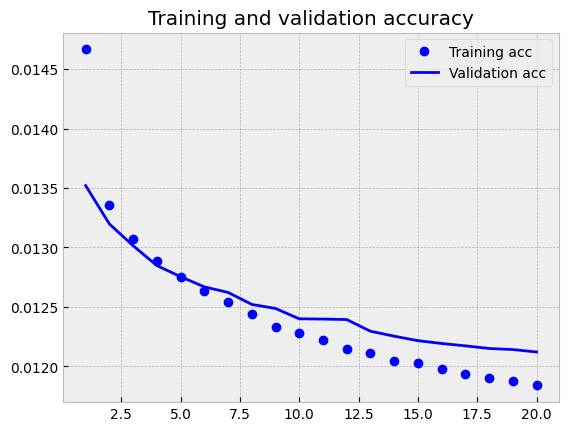

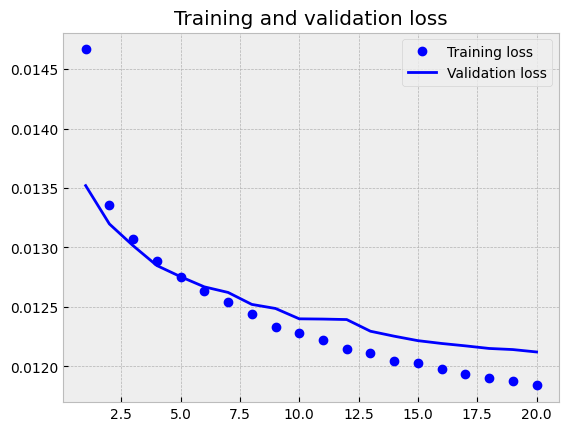

In [42]:
acc = history.history['mean_squared_error']
val_acc = history.history['val_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error

X_test_1 = np.array(X_test[0:14])
y_test_1 = np.array(y_test[0:14])

y_test_pred = np.array(model.predict(X_test_1))

y_test_pred = sc.inverse_transform(y_test_pred)
y_test_1 = sc.inverse_transform(y_test_1)

mean_squared_error(y_test_1,y_test_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


6.1536998832526875

In [44]:
# validation data, from d_1914 - d_1941
val = []
lookup = 14
for i in range(1885,1913):  
    val.append(train_new[i:i+lookup])

In [45]:
np.array(val).shape

(28, 14, 30490)

In [46]:
#np.array(y_val).shape

In [47]:
val1 = np.array(val[:14])
val1.shape

(14, 14, 30490)

In [48]:
val2 = np.array(val[14:])
val2.shape

(14, 14, 30490)

In [49]:
y_val1_pred = model.predict(val1)
np.array(y_val1_pred).shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


(14, 30490)

In [50]:
y_val2_pred = model.predict(val2)
np.array(y_val2_pred).shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


(14, 30490)

In [51]:
pd.DataFrame(y_val2_pred)

,0,1,2,3,4,5,6,7,8,9,...,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
0,0.118573,0.053650,0.071612,0.095626,0.091362,0.070654,0.098878,0.098346,0.013564,0.091454,...,0.169594,0.049797,0.140802,0.154217,0.081936,0.032723,0.002551,0.032048,0.068377,0.128749
1,0.112850,0.047840,0.064840,0.078172,0.079719,0.066518,0.092351,0.094960,0.013484,0.081061,...,0.161584,0.049888,0.130769,0.137895,0.076547,0.035822,0.004132,0.029867,0.064326,0.115945
2,0.112544,0.050187,0.067579,0.087206,0.085937,0.067756,0.094621,0.095574,0.014961,0.087692,...,0.162019,0.050291,0.135430,0.146226,0.080007,0.032973,0.003786,0.031481,0.062948,0.122855
3,0.109433,0.051246,0.067545,0.087446,0.087240,0.065083,0.092506,0.094491,0.016516,0.089301,...,0.156719,0.051520,0.135556,0.147530,0.077708,0.032614,0.005142,0.030652,0.061993,0.120813
4,0.110815,0.053779,0.070714,0.097790,0.093964,0.064901,0.096050,0.096316,0.020265,0.097047,...,0.160014,0.057578,0.141840,0.156034,0.083284,0.031661,0.005950,0.033590,0.063476,0.121282
5,0.117677,0.071800,0.084610,0.139429,0.122726,0.067174,0.108722,0.105801,0.027370,0.123914,...,0.178041,0.073850,0.161963,0.193215,0.107081,0.033745,0.003903,0.046013,0.075283,0.127746
6,0.112311,0.069524,0.081252,0.140308,0.120567,0.067025,0.104406,0.103715,0.032222,0.125311,...,0.172702,0.081622,0.162193,0.185952,0.111863,0.036857,0.007178,0.050101,0.070877,0.121182
7,0.096292,0.049041,0.061322,0.096601,0.086899,0.060911,0.089682,0.094450,0.033647,0.103151,...,0.144245,0.078005,0.144382,0.143263,0.092500,0.033274,0.010886,0.041883,0.046976,0.105854
8,0.087143,0.041830,0.053473,0.082280,0.076179,0.058480,0.082253,0.089658,0.037052,0.096142,...,0.132604,0.080407,0.137682,0.125421,0.089412,0.034221,0.014213,0.041046,0.038572,0.094878
9,0.081831,0.039024,0.049624,0.077032,0.072994,0.057416,0.078521,0.088022,0.040477,0.094642,...,0.128304,0.084683,0.136525,0.116539,0.090624,0.035573,0.016922,0.041247,0.035142,0.084936


In [52]:
y_val_pred = np.concatenate((y_val1_pred,y_val2_pred))
np.array(y_val_pred).shape

(28, 30490)

In [53]:
y_val_pred = sc.inverse_transform(y_val_pred)

In [54]:
pd.DataFrame(y_val_pred)

,0,1,2,3,4,5,6,7,8,9,...,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
0,0.670627,0.293272,0.507394,1.797978,0.976818,0.778931,0.344196,9.550390,0.289242,0.616626,...,1.941164,1.427100,1.559527,1.270356,2.204753,0.332628,-0.006598,0.719534,0.966208,1.736519
1,0.629465,0.264713,0.458963,1.534063,0.873894,0.740716,0.321525,9.130760,0.284898,0.559512,...,1.817712,1.379694,1.456349,1.146067,2.050485,0.351857,0.015363,0.663755,0.879921,1.626292
2,0.632151,0.274776,0.467096,1.598679,0.905512,0.751635,0.324424,9.132652,0.288563,0.573864,...,1.834948,1.373448,1.476047,1.171242,2.096076,0.356566,0.013616,0.678522,0.891205,1.641522
3,0.645232,0.294428,0.491896,1.787471,0.978164,0.775239,0.331682,9.294749,0.295974,0.616201,...,1.877026,1.375860,1.534997,1.240619,2.179790,0.349221,0.008625,0.706317,0.919967,1.717555
4,0.638401,0.282169,0.482648,1.685787,0.942970,0.765863,0.327799,9.166175,0.282814,0.590743,...,1.869787,1.368110,1.500835,1.197130,2.155402,0.370968,0.010958,0.698966,0.911797,1.668380
5,0.711860,0.373791,0.590349,2.235011,1.204846,0.794561,0.369345,10.130145,0.273562,0.709113,...,2.118330,1.498563,1.671250,1.477001,2.482791,0.390104,-0.045283,0.821636,1.157916,1.829874
6,0.759178,0.388345,0.629741,2.447660,1.285956,0.845658,0.382976,10.406702,0.250196,0.731902,...,2.270798,1.514680,1.735364,1.548001,2.642315,0.442403,-0.057208,0.911594,1.267174,1.907489
7,0.607713,0.267456,0.437327,1.482143,0.841917,0.730111,0.309200,9.065180,0.281667,0.553667,...,1.755534,1.390356,1.433201,1.104279,2.039650,0.365268,0.018321,0.663979,0.829745,1.578178
8,0.576196,0.252171,0.408431,1.304644,0.775074,0.693422,0.290407,8.771333,0.275077,0.516034,...,1.659690,1.361398,1.360399,1.026338,1.911260,0.392472,0.033894,0.618854,0.783797,1.498726
9,0.565494,0.253297,0.402804,1.248278,0.765625,0.678489,0.283864,8.698457,0.264860,0.501521,...,1.640229,1.330709,1.333583,1.006022,1.854505,0.397714,0.042250,0.594034,0.790626,1.453202


In [55]:
test =y_val_pred.reshape(28,1,30490)
np.array(test).shape

(28, 1, 30490)

In [56]:
test1 = test[0:14]
np.array(test1).shape

(14, 1, 30490)

In [57]:
test2 = test[14:]
np.array(test2).shape

(14, 1, 30490)

In [58]:
test_pred1 = model.predict(test1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


In [59]:
test_pred2 = model.predict(test2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [60]:
test_pred = np.concatenate((test_pred1,test_pred2))
np.array(test_pred).shape

(28, 30490)

In [61]:
test_pred = sc.inverse_transform(test_pred)

In [62]:
sub = sample
sub.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,ACCESORIES_1_001_NYC_1_validadtion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ACCESORIES_1_002_NYC_1_validadtion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ACCESORIES_1_003_NYC_1_validadtion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ACCESORIES_1_004_NYC_1_validadtion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ACCESORIES_1_005_NYC_1_validadtion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
sub_ids = sub.id
sub.drop('id',axis=1,inplace=True)

In [64]:
sub.shape

(60980, 28)

In [65]:
sub[0:30490] = test_pred[0:30490].T

In [66]:
print(sub.shape)
print(test_pred.shape)

(60980, 28)
(28, 30490)


In [67]:
sub[30490:60980] = test_pred[0:30490].T

In [68]:
sub.insert(loc=0, column='id', value=sub_ids)

In [70]:
sub

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,ACCESORIES_1_001_NYC_1_validadtion,0.274826,0.273913,0.273911,0.278257,0.274174,0.297802,0.298174,0.273831,0.273031,...,0.273851,0.279244,0.280644,0.272907,0.269818,0.267689,0.258119,0.225463,0.225227,0.210426
1,ACCESORIES_1_002_NYC_1_validadtion,0.224608,0.223686,0.223685,0.228223,0.223950,0.235003,0.235082,0.223666,0.223514,...,0.223670,0.229293,0.229986,0.217315,0.216772,0.217149,0.215941,0.214069,0.214146,0.218823
2,ACCESORIES_1_003_NYC_1_validadtion,0.181327,0.180007,0.180006,0.186505,0.180384,0.203783,0.204072,0.179941,0.179184,...,0.179957,0.188045,0.189465,0.165745,0.163168,0.160912,0.158077,0.142969,0.142901,0.138500
3,ACCESORIES_1_004_NYC_1_validadtion,1.258999,1.252573,1.252576,1.284463,1.254426,1.377946,1.379713,1.252749,1.254027,...,1.252707,1.292093,1.298586,1.270441,1.271026,1.266097,1.251124,1.242279,1.241949,1.220684
4,ACCESORIES_1_005_NYC_1_validadtion,0.755647,0.751694,0.751694,0.771315,0.752830,0.814831,0.815524,0.751682,0.751336,...,0.751685,0.776010,0.779570,0.744823,0.742459,0.738713,0.736496,0.733397,0.733351,0.731163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,SUPERMARKET_3_823_PHI_3_evaluation,0.535154,0.537135,0.537125,0.527921,0.536537,0.518742,0.518614,0.536620,0.531847,...,0.536742,0.525940,0.525476,0.541469,0.524891,0.520812,0.515979,0.526450,0.526593,0.538026
60976,SUPERMARKET_3_824_PHI_3_evaluation,0.317805,0.318475,0.318474,0.315570,0.318276,0.305817,0.305591,0.318431,0.317980,...,0.318442,0.315019,0.314651,0.330184,0.327586,0.326083,0.329920,0.353023,0.353109,0.360907
60977,SUPERMARKET_3_825_PHI_3_evaluation,0.752802,0.751972,0.751973,0.756211,0.752210,0.780930,0.781485,0.751983,0.751909,...,0.751981,0.757292,0.758789,0.769618,0.767834,0.763850,0.770264,0.747113,0.747008,0.738564
60978,SUPERMARKET_3_826_PHI_3_evaluation,0.355401,0.353696,0.353692,0.362338,0.354177,0.385405,0.385769,0.353523,0.352011,...,0.353564,0.364479,0.366607,0.329073,0.326075,0.327198,0.315201,0.295162,0.294924,0.279615
